# Supuestos sin intercambio
##### 1. 1 Álbum 
##### 2. 670 estampitas a coleccionar
##### 3. 1 sobre contiene 5 estampitas y no pueden ser repetidas. 
##### 4. La probabilidad de obtener cualquier estampa es la misma. 
##### 5. No existe intercambio de estampitas
##### 6. Precio por sobre Q6.75

# <span style="color:blue">Escenario 1: </span> 
## Simulación de Monte Carlo de una persona sin intercambio

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

numero_simulaciones=10000

#Definimos listas iniciales para añadir resultados por simulación
Resultados_sobres=[]
Costo_tot_sobres=[]
Repetidas_tot = []

#Inicia ronda de simulacion 1,2,3,4...etc
for simulacion in range(numero_simulaciones):

    #Definimos constantes
    estampas_totales = 670
    costo_sobre=6.75

    #Definimos valores iniciales de variables
    sobres_comprados = 0
    album = []
    estampas_faltantes = estampas_totales - len(album)
    lista_repetidas = []

    #Definimos funcion de abrir sobre (simula una accion de abrir sobre y pegar una estampa en el album, o añadir a la lista de repetidas)
    def abrir_sobre(estampas_sobre=5):
        #Hace referencia a que las asignaciones de estas variables modifican las variables globales existentes (definidas fuera de la funcion)
        #Cada vez que se invoque la funcion abrir_sobre se esta modificando las variables globales
        global sobres_comprados,estampas_faltantes
        sobres_comprados +=1
        num_estampa= np.random.choice(np.arange(1, 671), size=estampas_sobre, replace=False)   

        for estampa in num_estampa:
            if estampa not in album:
                album.append(estampa)
            else:
                lista_repetidas.append(estampa)
        estampas_faltantes=estampas_totales-len(album)

    #Mientras el coleccionista tenga estampas faltantes, sigue abriendo sobres
    while estampas_faltantes>0:
        abrir_sobre()

    #Recopilamos resultados de sobres totales, costo total, y total repetidas de cada simulación
    Resultados_sobres.append(sobres_comprados)
    Costo_tot_sobres.append(costo_sobre*sobres_comprados)
    Repetidas_tot.append(len(lista_repetidas))

#Determinamos resultados finales promedios con todas las simulaciones
Sobres_prom=sum(Resultados_sobres)/numero_simulaciones
Costo_prom=sum(Costo_tot_sobres)/numero_simulaciones
Repe_prom= sum(Repetidas_tot)/numero_simulaciones

# <span style="color:green">Resultados sin Intercambio </span>
#### <span style="color:green">Dataframe sin intercambio </span>

In [ ]:
#Dataframe de resultados
sobres_prom_series = pd.Series([Sobres_prom])
Costo_prom_series = pd.Series([Costo_prom])
Repe_prom_series=pd.Series([Repe_prom])
df = pd.DataFrame({  "Promedio sobres": sobres_prom_series, "Costo promedio (Q)": Costo_prom_series, "Promedio repetidas": Repe_prom_series })
df
df.style.hide(axis="index").format("{:,.0f}")


Promedio sobres,Costo promedio (Q),Promedio repetidas
949,"6,404","4,074"


In [ ]:
#Dataframe de datos por simulación
serie_sobres_simulaciones=pd.Series(Resultados_sobres)
serie_costo_simulaciones=pd.Series(Costo_tot_sobres)
data_frame_simulaciones=pd.DataFrame({"Promedio sobres":serie_sobres_simulaciones,"Costo sobres":serie_costo_simulaciones})
#data_frame_simulaciones

# <span style="color:orange">Histograma de frecuencia de sobres promedio </span>

np.float64(948.7306)

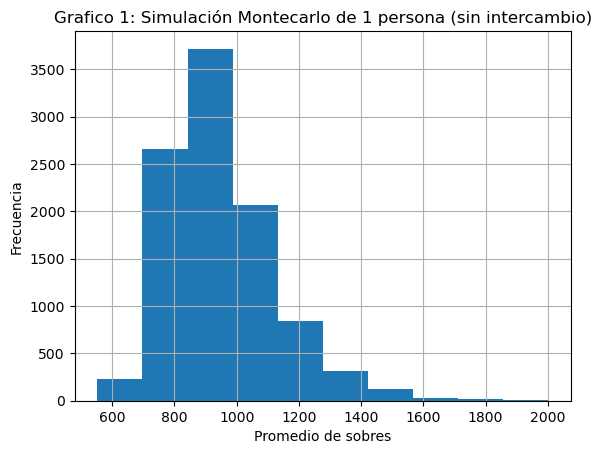

In [ ]:
#Histograma de sobres promedio
grafico1=data_frame_simulaciones["Promedio sobres"].hist()

grafico1.set_title("Grafico 1: Simulación Montecarlo de 1 persona (sin intercambio)")
grafico1.set_xlabel("Promedio de sobres")
grafico1.set_ylabel("Frecuencia")

data_frame_simulaciones["Promedio sobres"].mean()

# <span style="color:orange">Histograma de frecuencia de costo promedio </span>

np.float64(6403.93155)

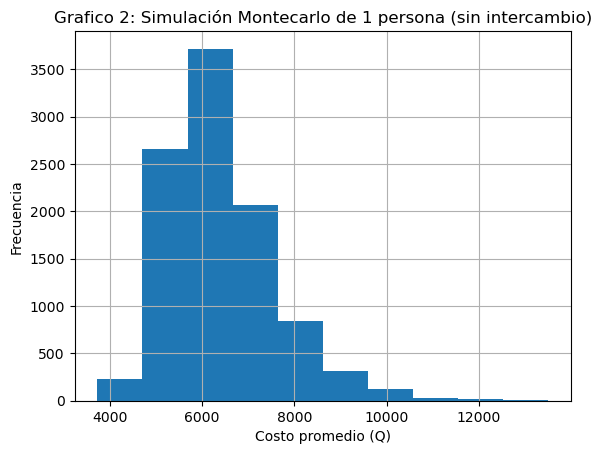

In [ ]:
#Histograma de costo promedio
grafico2=data_frame_simulaciones["Costo sobres"].hist()

grafico2.set_title("Grafico 2: Simulación Montecarlo de 1 persona (sin intercambio)")
grafico2.set_xlabel("Costo promedio (Q)")
grafico2.set_ylabel("Frecuencia")

data_frame_simulaciones["Costo sobres"].mean()

# <span style="color:blue">Escenario 2: </span> 
## Simulación de Monte Carlo de dos personas con intercambios

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

numero_simulaciones=10000

#Definimos listas iniciales para añadir resultados por simulación
Resultados_intercambio = []
Costo_tot_intercambio = []
Repetidas_tot_intercambio = []

#Para cada una de las simulaciones realizamos lo siguiente:
for simulacion in range(numero_simulaciones):

    #Variables constantes
    estampas_totales = 670
    estampas_sobre=5
    costo_sobre=6.75    

    #Listas de albumes vacias de coleccionistas 1 y 2
    album_1 = []
    album_2 = []

    #Listas de estampas faltantes de coleccionistas 1 y 2
    faltantes1 = list(range(1,estampas_totales+1))
    faltantes2 = list(range(1,estampas_totales+1))

    #Listas de estampas repetidas de coleccionistas 1 y 2
    lista_repetidas_1 = []
    lista_repetidas_2 = []

    #Contador de sobres comprados por cada coleccionista (no seran iguales al final de la simulacion)
    sobres_comprados_1 = 0
    sobres_comprados_2 = 0

    #Definimos funcion abrir sobre para Coleccionista 1 
    # Ejecuta una accion de comprar sobre, abrirlo, llenar album, remover estampa de faltantes, o añadirla a repetidas de Coleccionista 1
    def abrir_sobre_1():    
        global album_1, faltantes1, lista_repetidas_1, sobres_comprados_1
        sobres_comprados_1 +=1
        num_estampa_1= np.random.choice(np.arange(1, 671), size=estampas_sobre, replace=False) #Distribucion aleatoria, sin repetición de estampas
        for estampa in num_estampa_1:
            if estampa in faltantes1:
                album_1.append(estampa)
                faltantes1.remove(estampa)
            else:
                lista_repetidas_1.append(estampa)   

    #Definimos funcion abrir sobre para Coleccionista 2 
    # Ejecuta una accion de comprar sobre, abrirlo, llenar album, remover estampa de faltantes, o añadirla a repetidas de Coleccionista 2
    def abrir_sobre_2():    
        global album_2, faltantes2, lista_repetidas_2, sobres_comprados_2
        sobres_comprados_2 +=1
        num_estampa_2= np.random.choice(np.arange(1, 671), size=estampas_sobre, replace=False) #Distribucion aleatoria, sin repetición de estampas
        for estampa in num_estampa_2:
            if estampa in faltantes2:
                album_2.append(estampa)
                faltantes2.remove(estampa)
            else:
                lista_repetidas_2.append(estampa)   

    def intercambio():
        global album_1,album_2,lista_repetidas_1,lista_repetidas_2,faltantes1,faltantes2
        #Determinamos un set (conjunto) de estampas repetidas UNICAS por coleccionista
        repetidas_unicas_1=set(lista_repetidas_1)
        repetidas_unicas_2=set(lista_repetidas_2)
        
        #Determinamos las estampas disponibles de intercambio por cada uno de los coleccionistas
        #Revisando que las repetidas unicas de un coleccionista coincidan exactamente con las faltantes del otro coleccionista
        disponibles_intercambio_1=repetidas_unicas_1.intersection(set(faltantes2))
        disponibles_intercambio_2=repetidas_unicas_2.intersection(set(faltantes1))

        #Verificar que el número de intercambios sea el mismo para que sea de 1 x 1.
        if len(disponibles_intercambio_1) == len(disponibles_intercambio_2) and len(disponibles_intercambio_1)> 0:

            #Pasos para el intercambio entre 1 y 2
            #1. Transferencia de colecionista 1 a 2 
            for estampa in disponibles_intercambio_1:
                album_2.append(estampa)
            #2. Eliminación de estampa de la lista de faltantes de 2
                faltantes2.remove(estampa)
            #3. Eliminación de estampa de la lista de repetidas de 1
                lista_repetidas_1.remove(estampa)
            
            
            #1. Transferencia de colecionista 2 a 1 
            for estampa in disponibles_intercambio_2:
                album_1.append(estampa)
            #2. Eliminación de estampa de la lista de faltantes de 1
                faltantes1.remove(estampa)
            #3. Eliminación de estampa de la lista de repetidas de 2
                lista_repetidas_2.remove(estampa)

            return True
        
        else:
            return False  

    #Iniciamos un contador de rondas necesarias para que ambos Coleccionistas completen su album cada uno
    ronda=0
    while len(faltantes1)>0 or len(faltantes2)>0: #Mientras alguno de ellos tenga estampas faltantes, continúan las rondas (abren sobres o intercambian)
        ronda +=1

        #Al mismo tiempo, Coleccionista 1 y Coleccionista 2 abren 1 sobre a la vez. (A menos que uno de ellos lo complete antes)
        if len(faltantes1)>0: #Si Coleccionista 1 tiene estampas faltantes, abre sobre
            abrir_sobre_1()

        if len(faltantes2)>0: #Si Coleccionista 2 tiene estampas faltantes, abre sobre
            abrir_sobre_2()

        if len(faltantes1)>0 and len(faltantes2)>0: #Si al abrir cada uno un sobre, tienen faltantes, se procede a verificar si sucede intercambio o no
            intercambio()
    
    #En cada simulación, calculamos el total de sobres requeridos para que cada uno de los 2 coleccionistas llene su album como un promedio
    Sobres_comprados_tot = sobres_comprados_1 + sobres_comprados_2
    Sobres_promedio_sim = Sobres_comprados_tot/2
    Resultados_intercambio.append(Sobres_promedio_sim)
    
    #En cada simulación, se calcula el costo promedio como el costo por sobre y el total de sobres promedio entre los 2 coleccionistas
    Costo_prom_sim = Sobres_promedio_sim*costo_sobre
    Costo_tot_intercambio.append(Costo_prom_sim)

    #En cada simuación, el promedio de repetidas también es una media aritmetica de las repetidas de cada coleccionista
    Repetidas_totale_sim = len(lista_repetidas_1)+len(lista_repetidas_2)
    Repetidas_prom_sim = Repetidas_totale_sim/2
    Repetidas_tot_intercambio.append(Repetidas_prom_sim)

#Determinamos el promedio de sobres, costo promedio y promedio de repetidas de todas las simulaciones
Sobres_promedio_result = sum(Resultados_intercambio)/numero_simulaciones
Costo_promedio_result = sum(Costo_tot_intercambio)/numero_simulaciones
Repetidas_promedio_result = sum(Repetidas_tot_intercambio)/numero_simulaciones



# <span style="color:green">Resultados con Intercambio </span>
#### <span style="color:green">Dataframe con Intercambio </span>


In [ ]:
#Dataframe de resultados
sobres_prom_series = pd.Series([Sobres_promedio_result])
Costo_prom_series = pd.Series([Costo_promedio_result])
Repe_prom_series=pd.Series([Repetidas_promedio_result])
df = pd.DataFrame({"Promedio sobres": sobres_prom_series, "Costo promedio (Q)": Costo_prom_series, "Promedio repetidas": Repe_prom_series})
df
df.style.hide(axis="index").format("{:,.0f}")


Promedio sobres,Costo promedio (Q),Promedio repetidas
673,"4,542","2,694"


In [17]:
#Dataframe de datos por simulación
serie_sobres_simulaciones=pd.Series(Resultados_intercambio)
serie_costo_simulaciones=pd.Series(Costo_tot_intercambio)
data_frame_simulaciones=pd.DataFrame({"Promedio sobres":serie_sobres_simulaciones,"Costo sobres":serie_costo_simulaciones})
#data_frame_simulaciones

np.float64(672.8544)

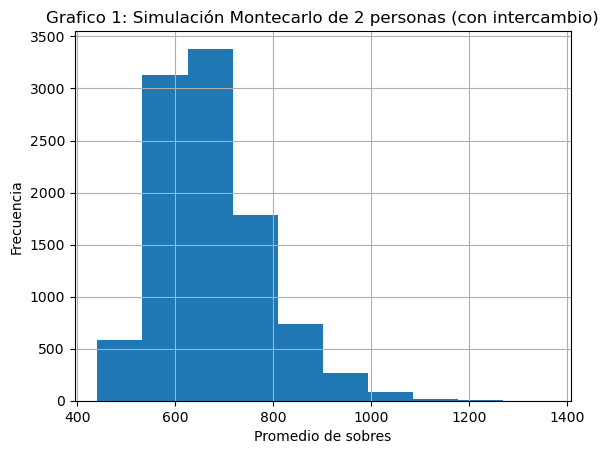

In [18]:
#Histograma de sobres promedio
grafico1=data_frame_simulaciones["Promedio sobres"].hist()

grafico1.set_title("Grafico 1: Simulación Montecarlo de 2 personas (con intercambio)")
grafico1.set_xlabel("Promedio de sobres")
grafico1.set_ylabel("Frecuencia")

data_frame_simulaciones["Promedio sobres"].mean()

np.float64(4541.7672)

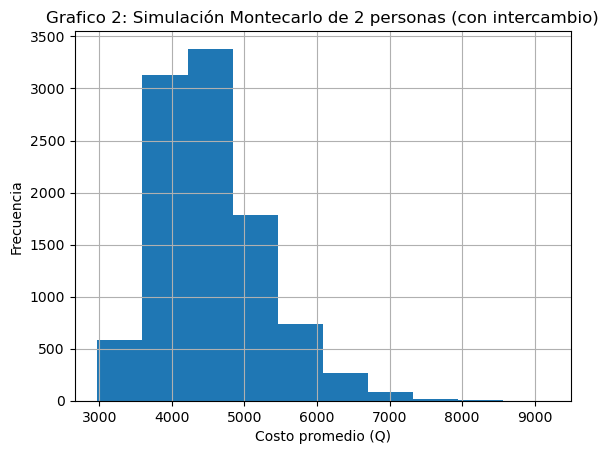

In [ ]:
#Histograma de costo promedio
grafico2=data_frame_simulaciones["Costo sobres"].hist()

grafico2.set_title("Grafico 2: Simulación Montecarlo de 2 personas (con intercambio)")
grafico2.set_xlabel("Costo promedio (Q)")
grafico2.set_ylabel("Frecuencia")

data_frame_simulaciones["Costo sobres"].mean()

# <span style="color:blue"> Comparación de escenarios con 10,000 simulaciones </span> 

| Escenarios | Número de sobres | Costo promedio |Número de Repetidas  
| --- | --- | --- | --- |
| Sin Intercambio | 949| Q 6,404 |4,074
| Con Intercambio | 673 |Q 4,542 |2,694
| Diferencia | 276 |Q 1,862 |1,380